# 종합실습_후판공장scale
### 분석배경: xx공장의 고객사에서 최근 들어 "Scale 불량 발생 증가"라는 이슈가 발생했다. 

### 그 원인을 분석해 본 결과 압연공정에서 Scale 불량이 급증한 것을 확인할 수 있었다. 

### 데이터를 수집하여 다양한 분석을 통해 불량 발생의 근본 원인을 찾고 결과를 해석하여 개선 기회를 도출한다.

# 1. 모듈 import 

In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale,minmax_scale,robust_scale
#%matplotlib inline background 그래프 실행 및 결과 확인
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
#예측
from sklearn.tree import export_graphviz 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
#모델 성능 평가
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#confusion matrix
from sklearn.metrics import confusion_matrix

#Scale 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler
#주성분 분석
from sklearn.decomposition import PCA
#회귀분석
import statsmodels.api as sm
#RMSE:root mean squared error 함수
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
#MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
#분류 : KNN
from sklearn.neighbors import KNeighborsClassifier
#로지스틱 회귀
from statsmodels.api import Logit
#데이터 분항
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import os
import graphviz
from sklearn.metrics import f1_score
from scipy.stats import chi2_contingency
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib
import seaborn as sns
import time
import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['font.family']='NanumGothic'

In [61]:
df_scale=pd.read_csv("C:/Users/nsh65/Documents/POSCO_Ai-BigData_academy/Week2_BigData/실습파일/SCALE불량.csv",engine="python",encoding='cp949')
df_scale.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조


In [62]:
df_scale.isnull().sum()

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

In [63]:
df_scale.columns

Index(['PLATE_NO', 'ROLLING_DATE', 'SCALE', 'SPEC', 'STEEL_KIND', 'PT_THK',
       'PT_WDTH', 'PT_LTH', 'PT_WGT', 'FUR_NO', 'FUR_NO_ROW', 'FUR_HZ_TEMP',
       'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_TIME', 'FUR_EXTEMP',
       'ROLLING_TEMP_T5', 'HSB', 'ROLLING_DESCALING', 'WORK_GR'],
      dtype='object')

In [64]:
df_scale.shape
# columns 21개 

(720, 21)

In [65]:
drop_lst = ["PLATE_NO","ROLLING_DATE"]
df_scale.drop(drop_lst,axis = 1, inplace=True)

In [66]:
df_scale_x = df_scale.drop("SCALE",axis = 1)
df_scale_y = df_scale["SCALE"]
df_scale_y.head()

0    양품
1    양품
2    양품
3    양품
4    양품
Name: SCALE, dtype: object

In [67]:
# 양품 : 0 , 불량: 1
df_scale.SCALE = df_scale.SCALE.map(lambda x:0 if x == "양품" else 1)
df_scale

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1133,934,적용,8,2조
1,0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1135,937,적용,8,2조
2,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1121,889,적용,8,3조
3,0,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1127,885,적용,8,3조
4,0,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1128,873,적용,8,1조
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1,NK-KA,C0,20.14,3580,38639,21870,3호기,1,1172,72,1164,62,245,1164,1005,적용,8,2조
716,0,NV-A32,C0,15.08,3212,48233,18340,2호기,1,1150,61,1169,61,238,1169,947,적용,10,1조
717,0,NV-A32,C0,16.60,3441,43688,19590,2호기,2,1169,65,1163,77,247,1163,948,적용,10,4조
718,0,LR-A,C0,15.59,3363,48740,80240,3호기,2,1179,86,1163,45,243,1163,940,적용,10,2조


In [68]:
df_scale.HSB = df_scale.HSB.map(lambda x:1 if x == "적용" else 0)

In [69]:
# 불량 개수 231개
(df_scale.SCALE ==1).sum()

231

In [70]:
# 설명변수(x),목표변수(y)로 분리
df_scale_x = df_scale.drop("SCALE",axis = 1)
df_scale_y = df_scale["SCALE"]
df_scale_x.head()

,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1133,934,1,8,2조
1,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1135,937,1,8,2조
2,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1121,889,1,8,3조
3,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1127,885,1,8,3조
4,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1128,873,1,8,1조


## 이상치 확인 및 처리( ROLLING_TEMP_T5) ##

범주형,numeric 변수를 분리

In [71]:
# char & numeric 분리
df_scale_x_char = df_scale_x.select_dtypes(include = "object")
df_scale_x_num = df_scale_x.select_dtypes(exclude = "object")

In [72]:
df_scale_x_num.describe()
# 통계량과 비교하여 이상치 확인

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,29.267857,2807.127778,34323.269444,41481.777778,1.497222,1155.338889,88.527778,1149.666667,78.802778,300.563889,1149.666667,933.920833,0.954167,8.319444
std,19.152651,517.839690,13828.434837,24751.322015,0.500340,20.866398,37.660799,17.571788,36.421004,45.390303,17.571788,107.863887,0.209269,1.623252
min,12.030000,1800.000000,7893.000000,7820.000000,1.000000,1103.000000,43.000000,1113.000000,35.000000,221.000000,1113.000000,0.000000,0.000000,5.000000
25%,16.090000,2466.000000,22663.000000,17757.500000,1.000000,1139.000000,65.000000,1132.000000,57.750000,257.000000,1132.000000,889.750000,1.000000,6.000000
50%,20.130000,2725.000000,37380.000000,36120.000000,1.000000,1158.000000,75.000000,1155.000000,67.500000,304.000000,1155.000000,951.000000,1.000000,8.000000
75%,40.000000,3125.000000,43735.000000,61120.000000,2.000000,1171.000000,101.000000,1164.000000,86.000000,342.000000,1164.000000,994.250000,1.000000,10.000000
max,100.340000,4575.000000,54917.000000,115080.000000,2.000000,1206.000000,312.000000,1185.000000,294.000000,398.000000,1185.000000,1078.000000,1.000000,10.000000


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


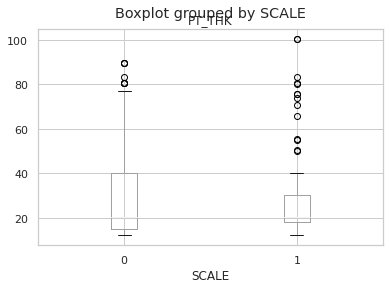

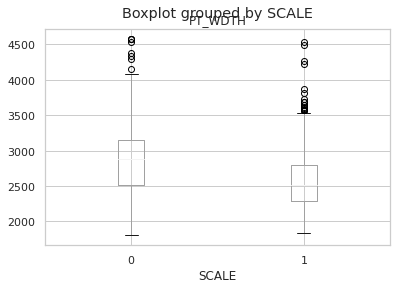

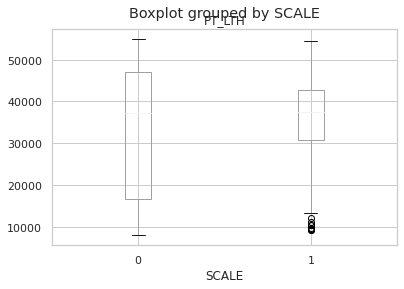

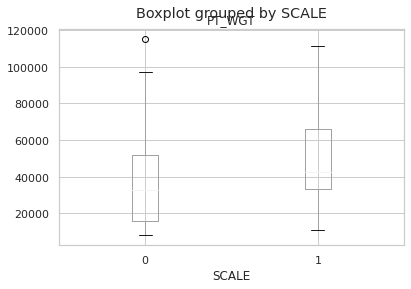

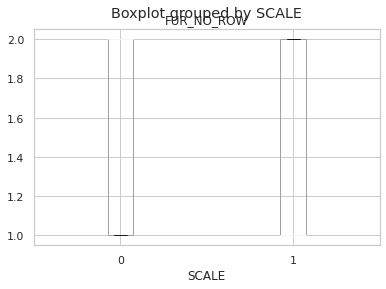

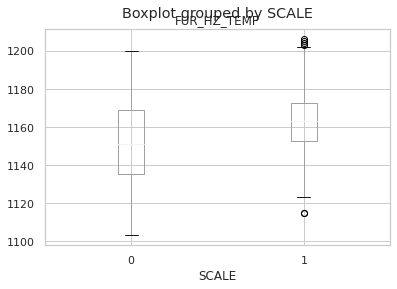

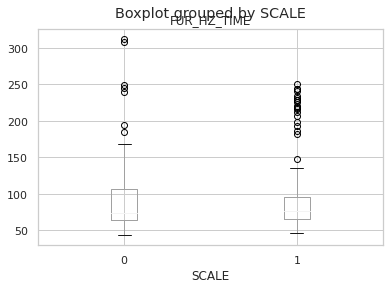

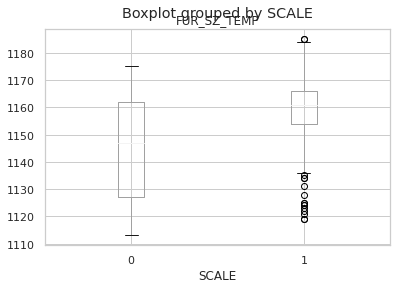

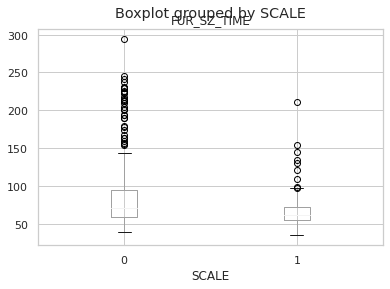

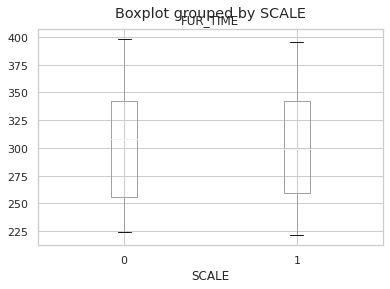

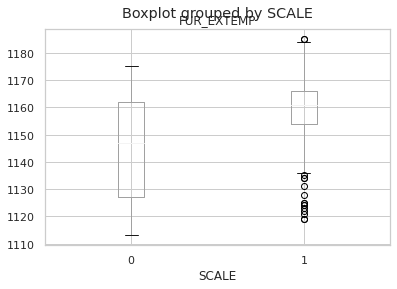

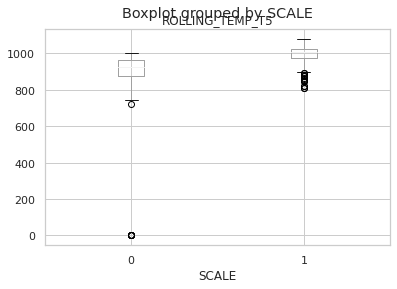

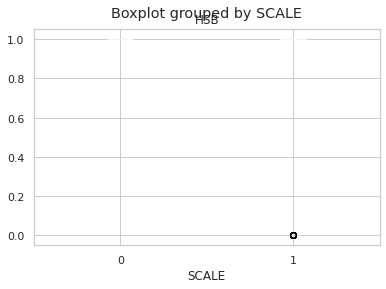

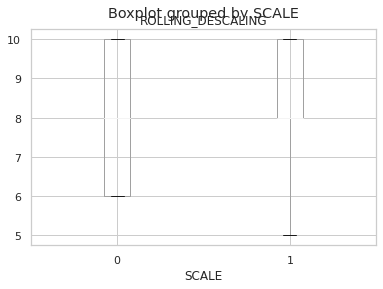

In [73]:
# for col in df_scale
for col in df_scale_x_num:
    df_scale.boxplot(column = col,by = "SCALE")

In [74]:
df_scale_x["ROLLING_TEMP_T5"][df_scale_x.ROLLING_TEMP_T5.values == 0] 

41     0
184    0
185    0
494    0
495    0
496    0
Name: ROLLING_TEMP_T5, dtype: int64

In [75]:
stats.tmean(df_scale_x.ROLLING_TEMP_T5.values)

933.9208333333333

In [76]:
### 압연온도가 0으로 이상치이지만, 많은데이터가 아니므로 기계이상이나, 특이점으로 보기 힘들다.
### 따라서, 평균값으로 이상치를 대체하겠다.
df_scale_x["ROLLING_TEMP_T5"][df_scale_x.ROLLING_TEMP_T5.values == 0] = stats.tmean(df_scale_x.ROLLING_TEMP_T5.values)

- box plot 결과 이상치가 발생하지만, 압연온도를 제외한 이상치들은 이유를 판단하기 어렵고, 주어진 데이터가 크지 않기 때문에 이상치를 처리하는 것에 따라 많은 결과에 많이 영향을 줄 것이라 예상하여, 이상치를 포함하기로한다.

<h2> 탐색적 분석 (bar chart , histogram)

number of 양품:  489
number of 불량:  231


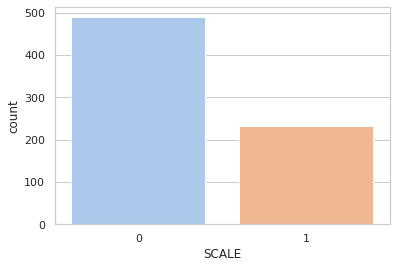

In [77]:
# 양품과 불량의 개수 파악
ax= sns.countplot(df_scale_y,label = "Count")
B,M= df_scale_y.value_counts()
print("number of 양품: ",B)
print("number of 불량: ",M)

In [78]:
def fun_print_crosstab(data,var):
    print(pd.crosstab(index = data["SCALE"],columns = data[var]))
    print()
    print(pd.crosstab(index = data["SCALE"],columns = data[var],normalize = "columns").round(3))

In [79]:
#강종
fun_print_crosstab(df_scale,"STEEL_KIND")

STEEL_KIND   C0  C1  C3  T0  T1  T3  T5  T7  T8
SCALE                                          
0           291   0   6  14  16   2  41  29  90
1           212   1   1   2   2   0   2   6   5

STEEL_KIND     C0   C1     C3     T0     T1   T3     T5     T7     T8
SCALE                                                                
0           0.579  0.0  0.857  0.875  0.889  1.0  0.953  0.829  0.947
1           0.421  1.0  0.143  0.125  0.111  0.0  0.047  0.171  0.053


In [80]:
# 가열로 호기
fun_print_crosstab(df_scale,"FUR_NO")

FUR_NO  1호기  2호기  3호기
SCALE                
0       167  167  155
1        73   70   88

FUR_NO    1호기    2호기    3호기
SCALE                      
0       0.696  0.705  0.638
1       0.304  0.295  0.362


In [81]:
# WORK GR 작업조
fun_print_crosstab(df_scale,"WORK_GR")

WORK_GR   1조   2조   3조   4조
SCALE                      
0        122  120  118  129
1         67   45   54   65

WORK_GR     1조     2조     3조     4조
SCALE                              
0        0.646  0.727  0.686  0.665
1        0.354  0.273  0.314  0.335


In [82]:
fun_print_crosstab(df_scale,"HSB")


HSB     0    1
SCALE         
0       0  489
1      33  198

HSB      0      1
SCALE            
0      0.0  0.712
1      1.0  0.288


<h3> 범주형 변수 그래프 분석(유의성관련) <h3> - 바이올린 플랏

<h4> 가열로 호기 <h4>

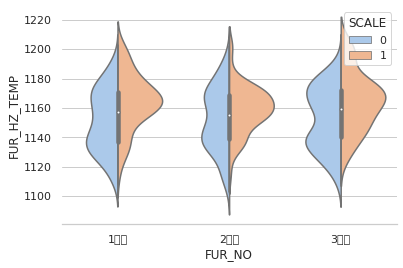

In [83]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="FUR_NO", y="FUR_HZ_TEMP", hue="SCALE",
               split=True,       
               data=df_scale)
sns.despine(left=True)

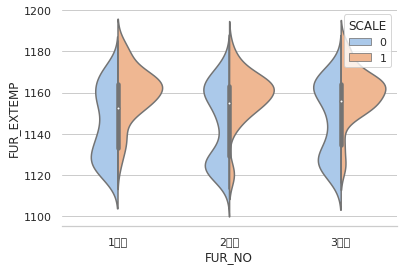

In [84]:
# import seaborn as sns

# 호기별 가열로 탈출 온도와,scale의 분포
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="FUR_NO", y="FUR_EXTEMP", hue="SCALE",
               split=True, 
               data=df_scale)
sns.despine(left=True)

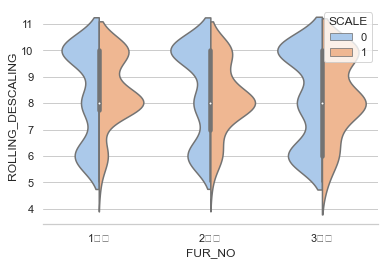

In [85]:
# import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# 호기별 디스케일링 횟수와,scale의 분포
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="FUR_NO", y="ROLLING_DESCALING", hue="SCALE",
               split=True, 
               data=df_scale)
sns.despine(left=True)

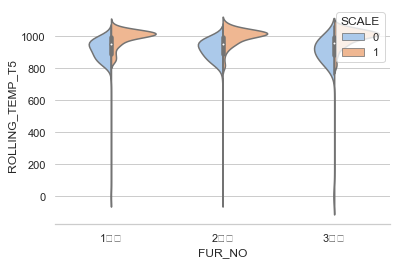

In [86]:
# import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# 호기별 압연온도와 scale의 분포
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="FUR_NO", y="ROLLING_TEMP_T5", hue="SCALE",
               split=True, 
               data=df_scale)
sns.despine(left=True)
# 1000도일때 가장 불량이 많이나온다.

<h4> 작업조 WORK_GR <h4>

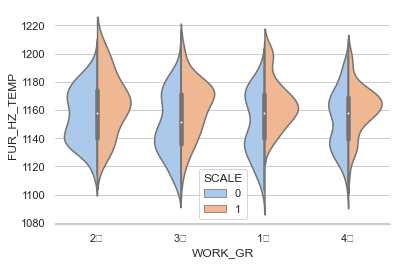

In [87]:
# import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# 작업조별 가열대 온도와,scale의 분포

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="WORK_GR", y="FUR_HZ_TEMP", hue="SCALE",
               split=True,
               data=df_scale)
sns.despine(left=True)
# 1160~1180 일때 불량이 많이 나옴

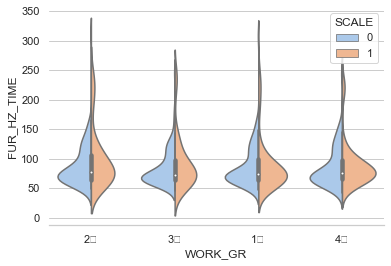

In [88]:
# import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# 작업조별 가열대 시간과 ,scale의 분포

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="WORK_GR", y="FUR_HZ_TIME", hue="SCALE",
               split=True, 
               data=df_scale)
sns.despine(left=True)
# 시간은 작업조마다, 차이가 없다. 왜냐 정해져있는 시간이 존재하기 때문이다.

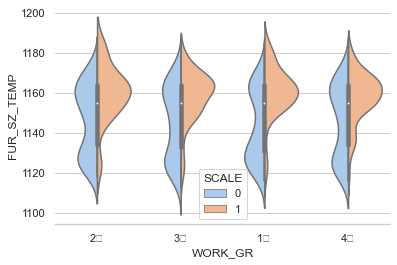

In [89]:
# import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# 작업조별 균열대 온도와,scale의 분포

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="WORK_GR", y="FUR_SZ_TEMP", hue="SCALE",
               split=True, 
               data=df_scale)
sns.despine(left=True)

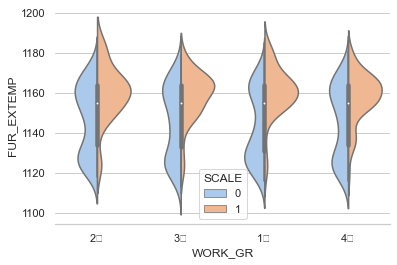

In [90]:
# import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# 작업조별 가열로 탈출 온도와,scale의 분포

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="WORK_GR", y="FUR_EXTEMP", hue="SCALE",
               split=True, 
               data=df_scale)
sns.despine(left=True)

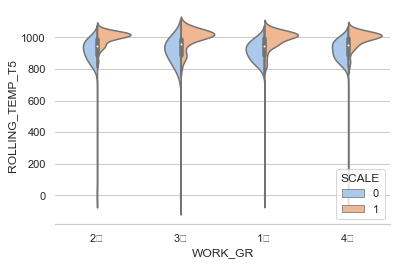

In [91]:
# import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# 작업조별 압연 중 Descaling 횟수와,scale의 분포

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="WORK_GR", y="ROLLING_TEMP_T5", hue="SCALE",
               split=True,
               data=df_scale)
sns.despine(left=True)

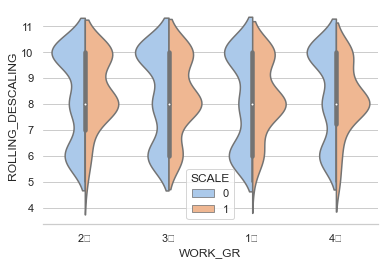

In [92]:
# import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# 작업조별 descaling 횟수와,scale의 분포

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="WORK_GR", y="ROLLING_DESCALING", hue="SCALE",
               split=True, 
               data=df_scale)
sns.despine(left=True)

- 작업조와 가열로 호기마다 유의미한 차이가 보이지 않는다.

In [93]:
# char 변수 값 확인하기
for name in df_scale_x_char:
    print(df_scale_x_char[name].value_counts())

JS-SM490YB    84
LR-A          54
NV-A          48
PILAC-BT33    40
BV-EH36-TM    35
              ..
KR-B           1
BV-EH32-TM     1
BV-AH36-TM     1
LR-AH36        1
LR-EH32-TM     1
Name: SPEC, Length: 66, dtype: int64
C0    503
T8     95
T5     43
T7     35
T1     18
T0     16
C3      7
T3      2
C1      1
Name: STEEL_KIND, dtype: int64
3호기    243
1호기    240
2호기    237
Name: FUR_NO, dtype: int64
4조    194
1조    189
3조    172
2조    165
Name: WORK_GR, dtype: int64


In [94]:
def bar_chart(feature):
    postive = df_scale[df_scale["SCALE"]==0][feature].value_counts()
    negative = df_scale[df_scale["SCALE"]==1][feature].value_counts()
    df = pd.DataFrame([postive,negative])
    df.index = ['양품','불량']
    df.plot(kind = 'bar', figsize= (10,5))

<h2> 가설검증 (목표변수 : 범주형 , 설명변수: 범주형) - 카이제곱검정(유의한 변수 찾기) <h2>

가설검증 - 카이제곱 분포("FUR_NO")

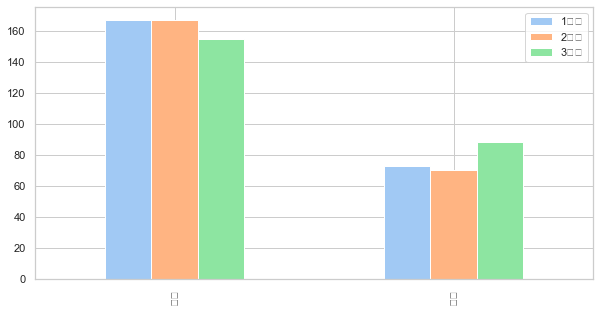

In [95]:
bar_chart("FUR_NO")
# 그래프를 보면 1호기와 2호기의 양품개수는 같다
# 전체적인 비율로 보았을때, 호기별로 양품과 불량의 차이는 거의 없을것이다.
# 분류모델 적용시 제거해도 무방

In [96]:
positive = df_scale[df_scale["SCALE"]==0]['FUR_NO'].value_counts()# 양품
negative = df_scale[df_scale["SCALE"]==1]['FUR_NO'].value_counts()# 불량

In [97]:
df1_fur = pd.DataFrame([positive,negative],index=["양품","불량"])
df1_fur.T

,양품,불량
1호기,167,73
2호기,167,70
3호기,155,88


In [98]:
chi,pval,dof,expected = chi2_contingency(df1_fur.T)
print('chisq:{0:0.3f}'.format(chi))
print('p:{0:0.3f}'.format(pval))
print('df:{}'.format(dof))
print('expected val :{}'.format(expected.round(3)))

chisq:2.915
p:0.233
df:2
expected val :[[163.     77.   ]
 [160.962  76.038]
 [165.038  77.962]]


카이제곱 검정 결과, FUR_NO와 scale의 pvalue 0.233>0.05로 유의한 변수가 아니다. 따라서 이후 모델검정때 변수로 선택하지 않겠다.

가설검증 -카이제곱(STEEL_KIND)

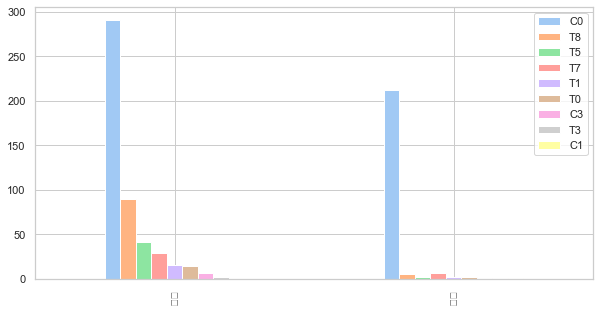

In [99]:
bar_chart("STEEL_KIND")
# 그래프를 보면 강종의 종류중 C0가 압도적으로 양품과 불량의 수가 많다
# C0의 강종으로 많이 생산되는것을 알 수 있다.
# 비율로 따지면, C0가 불량률이 제일 높다.

In [100]:
# 강종의 종류와, counts 
df_scale.STEEL_KIND.value_counts()

C0    503
T8     95
T5     43
T7     35
T1     18
T0     16
C3      7
T3      2
C1      1
Name: STEEL_KIND, dtype: int64

In [101]:
# 강종의 경우 C0가 다른 종류보다 확연한 차이로 많기 때문에 제거할 수 없고,
# 위에서 살펴본 강종별 불량의 개수를 참고하여,
# 스케일 양품과 불량으로 나누면, T3과 C1은 제외해도 무방하다.
df_scale_x_char.STEEL_KIND.value_counts()

C0    503
T8     95
T5     43
T7     35
T1     18
T0     16
C3      7
T3      2
C1      1
Name: STEEL_KIND, dtype: int64

In [102]:
positive = df_scale[df_scale["SCALE"]==0]['STEEL_KIND'].value_counts() # 양품
negative = df_scale[df_scale["SCALE"]==1]['STEEL_KIND'].value_counts() # 불량
df1_st = pd.DataFrame([positive,negative],index = ["양품","불량"])
df1_st = df1_st.drop(["T3","C1"],axis = 1) # T3,C1의 경우 수가 매우적어, NAN값으로 나온다. 그래서 삭제
df1_st.T


,양품,불량
C0,291.0,212.0
T8,90.0,5.0
T5,41.0,2.0
T7,29.0,6.0
T1,16.0,2.0
T0,14.0,2.0
C3,6.0,1.0


In [103]:
# 카이제곱 검정
chi,pval,dof,expected =chi2_contingency(df1_st.T)
print('chisq:{0:0.3f}'.format(chi))
print('p:{0:0.3f}'.format(pval))
print('df:{}'.format(dof))
print('expected val :{}'.format(expected.round(3)))

chisq:80.650
p:0.000
df:6
expected val :[[341.647 161.353]
 [ 64.526  30.474]
 [ 29.206  13.794]
 [ 23.773  11.227]
 [ 12.226   5.774]
 [ 10.868   5.132]
 [  4.755   2.245]]


강종과 scale의 카이제곱 검정결과, pvalue = 0.000 < 0.05 이므로 강종은 스케일 불량에 매우 유의한 변수이다, 이후 변수 선택에서 포함한다.

가설검증 - 카이제곱 분포(WORK_GR)

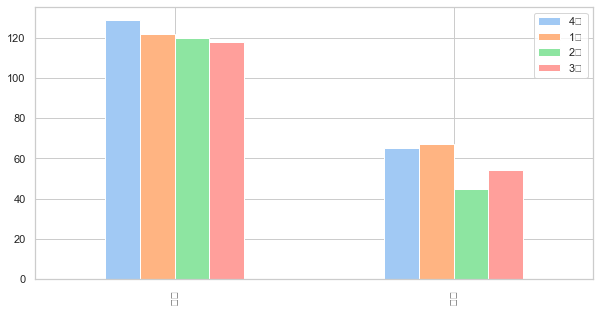

In [104]:
bar_chart("WORK_GR")
# 그램에서 보면, 불량의 경우 비율상 1조가 가장 많은 양이 나오고, 그다음으로 4조가 불량이 많이나온다.
# 전체적인 비율로 보았을때 작업조에 따라 양품과 불량의 비율이 큰 차이가 나질 않는다
# 유의하지 않을꺼라 봄

In [105]:
positive = df_scale[df_scale["SCALE"]==0]['WORK_GR'].value_counts()
negative = df_scale[df_scale["SCALE"]==1]['WORK_GR'].value_counts()
df1_wk = pd.DataFrame([positive,negative],index = ["양품","불량"])
df1_wk.T

,양품,불량
4조,129,65
1조,122,67
2조,120,45
3조,118,54


In [106]:
chi,pval,dof,expected = chi2_contingency(df1_wk.T)
print('chisq:{0:0.3f}'.format(chi))
print('p:{0:0.3f}'.format(pval))
print('df:{}'.format(dof))
print('expected val :{}'.format(expected.round(3)))

chisq:2.953
p:0.399
df:3
expected val :[[131.758  62.242]
 [128.363  60.638]
 [112.062  52.938]
 [116.817  55.183]]


작업조와 scale의 카이제곱 검정결과, pvalue = 0.399 > 0.05 이므로 작업조는 스케일 불량에 유의한 변수가 아님으로 판단하고, 이후 변수 선택에서 제외한다.

<h3> 카이제곱 검정(HSB) <h3>

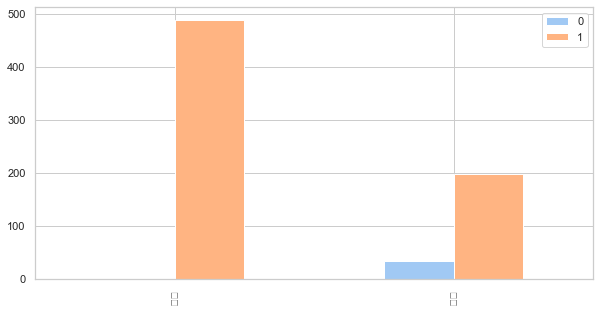

In [107]:
# HSB 적용한경우 양품밖에 없지만, 미적용시 불량이 조금생겼다.
bar_chart("HSB")

In [108]:
positive = df_scale[df_scale["SCALE"]==0]['HSB'].value_counts()
negative = df_scale[df_scale["SCALE"]==1]['HSB'].value_counts()
df1_h = pd.DataFrame([positive,negative],index = ["양품","불량"])
df1_h.fillna(0) # HSB미적용시 양품 0개

,0,1
양품,0.0,489.0
불량,33.0,198.0


In [109]:
chi,pval,dof,expected = chi2_contingency(df1_h.T)
print('chisq:{0:0.3f}'.format(chi))
print('p:{0:0.3f}'.format(pval))
print('df:{}'.format(dof))
print('expected val :{}'.format(expected.round(3)))
# less equal 오류 수치계산이 불가하다. 

chisq:nan
p:nan
df:1
expected val :[[nan nan]
 [nan nan]]


<h3> 카이제곱 검정 (SPEC) <h3>

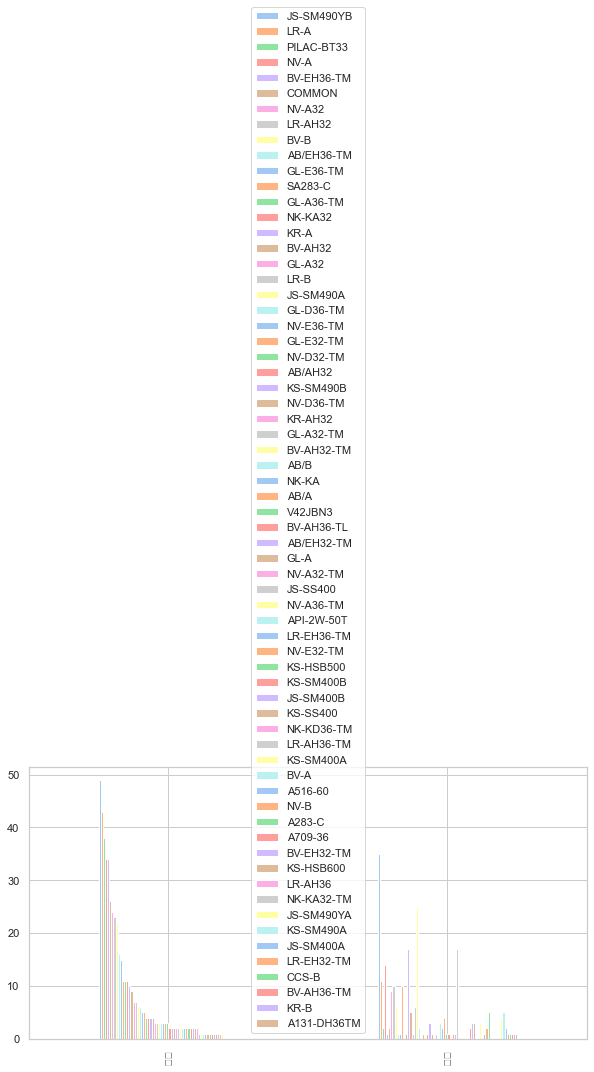

In [110]:
bar_chart("SPEC")
# 그래프를 보면, js-sn490YB가 가장양이 많다

In [111]:
df_scale.SPEC.value_counts().describe()
# Value counts 의 통계량

count    66.000000
mean     10.909091
std      15.380034
min       1.000000
25%       2.000000
50%       5.000000
75%      12.750000
max      84.000000
Name: SPEC, dtype: float64

In [112]:
df_scale.SPEC.describe()
# 총 66개의 spec
# 제일 개수가 많은 건 JS-SM490YB (84개)

count            720
unique            66
top       JS-SM490YB
freq              84
Name: SPEC, dtype: object

In [113]:
df_scale.SPEC.value_counts()

JS-SM490YB    84
LR-A          54
NV-A          48
PILAC-BT33    40
BV-EH36-TM    35
              ..
KR-B           1
BV-EH32-TM     1
BV-AH36-TM     1
LR-AH36        1
LR-EH32-TM     1
Name: SPEC, Length: 66, dtype: int64

In [114]:
positive = df_scale[df_scale["SCALE"]==0]['SPEC'].value_counts()
negative = df_scale[df_scale["SCALE"]==1]['SPEC'].value_counts()
df1_sp = pd.DataFrame([positive,negative],index = ["양품","불량"])
df1_sp = df1_sp[["JS-SM490YB","LR-A","NV-A","PILAC-BT33","NV-A32","LR-AH32","JS-SM490A","BV-B"]]
# 양품과 불량으로 나뉘기 때문에 불량의 수가 너무 적은 컬럼은 카이제곱 검정이 불가하다.
# 따라서 양품+불량 개수가 유의한 결과가 나올수있는 값들만 따로 TABLE을 만든다.
df1_sp.columns

Index(['JS-SM490YB', 'LR-A', 'NV-A', 'PILAC-BT33', 'NV-A32', 'LR-AH32',
       'JS-SM490A', 'BV-B'],
      dtype='object')

In [115]:
chi,pval,dof,expected = chi2_contingency(df1_sp.T)
print('chisq:{0:0.3f}'.format(chi))
print('p:{0:0.3f}'.format(pval))
print('df:{}'.format(dof))
print('expected val :{}'.format(expected.round(3)))

chisq:56.157
p:0.000
df:7
expected val :[[57.197 26.803]
 [36.769 17.231]
 [32.684 15.316]
 [27.236 12.764]
 [22.47  10.53 ]
 [22.47  10.53 ]
 [21.108  9.892]
 [19.066  8.934]]


SPEC과 scale의 카이제곱 검정결과, pvalue = 0.000 < 0.05 이므로 SPEC은 스케일 불량에 유의한 변수로 판단하고, 변수로 채택한다.

In [116]:
df_spec = pd.DataFrame(df_scale['SPEC'])
df_spec # 이후 원하는 스펙 값들로만 변수로 채택하기 위해 데이터 프레임을 만들어 놓는다.

,SPEC
0,AB/EH32-TM
1,AB/EH32-TM
2,NV-E36-TM
3,NV-E36-TM
4,BV-EH36-TM
...,...
715,NK-KA
716,NV-A32
717,NV-A32
718,LR-A


displot을 활용하여, 수치형 변수들의 분포살펴보기

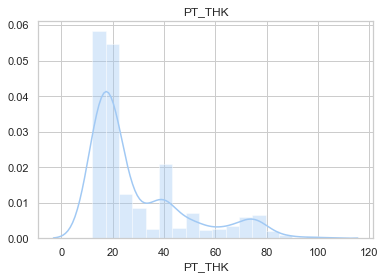

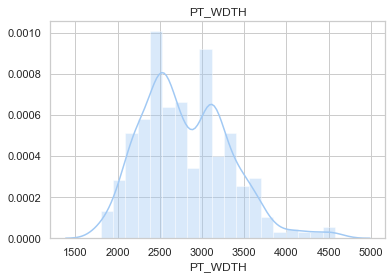

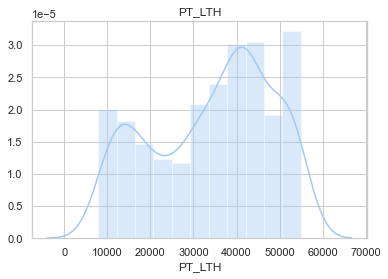

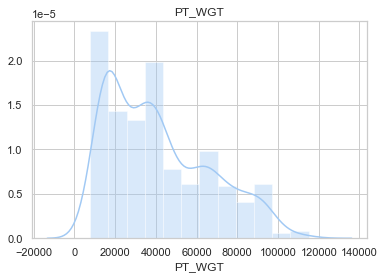

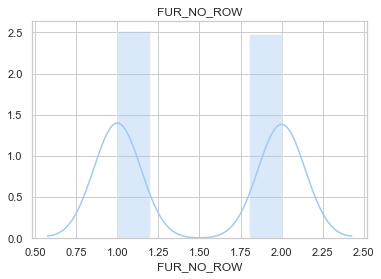

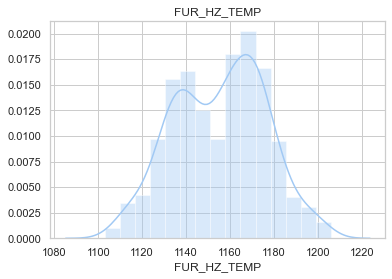

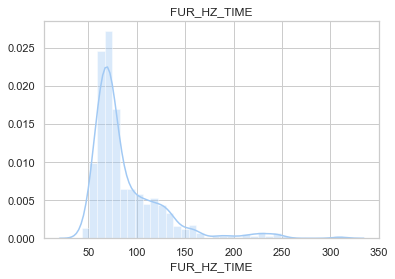

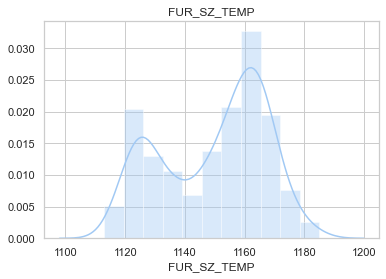

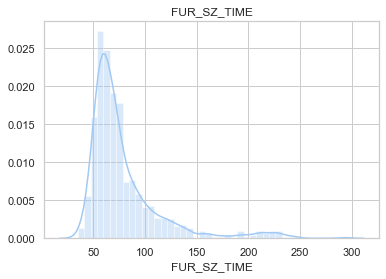

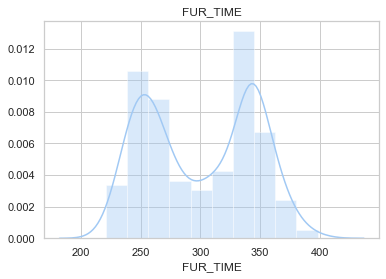

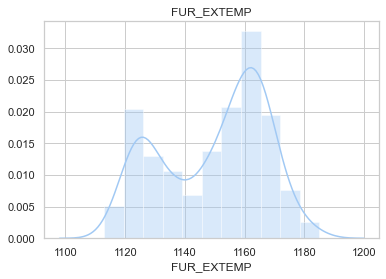

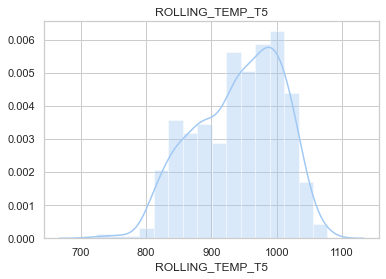

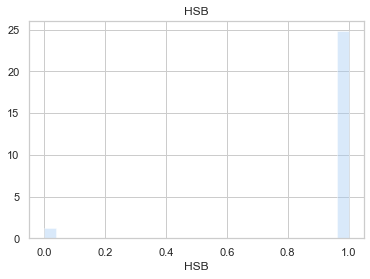

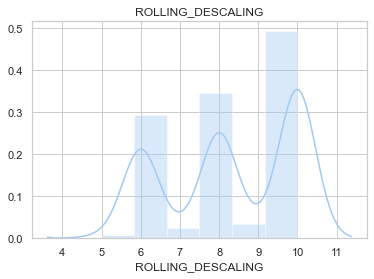

In [117]:
# distplot을 사용하여, 수치형 변수들의 분포살펴보기 
for col in df_scale_x_num:
    sns.distplot(df_scale_x.loc[df_scale_x[col].notnull(), col])
    plt.title(col)
    plt.show()

hist plot을 이용하여, 목표변수와의 관계 보기


In [118]:
def hist_map(feature):
    grid = sns.FacetGrid(df_scale, col = "SCALE")
    grid.map(plt.hist,feature)

In [119]:
def hist_map2(feature):
    plt.hist(df_scale[df_scale["SCALE"]==0][feature],label = "양품",alpha = 0.5)
    plt.hist(df_scale[df_scale["SCALE"]==1][feature],label = "불량",alpha = 0.5)
    

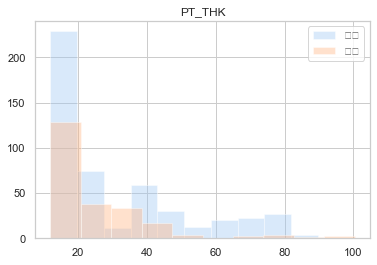

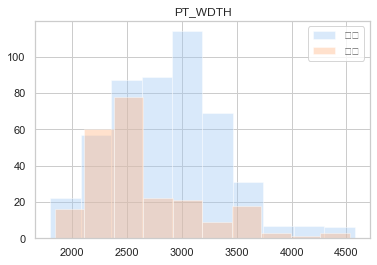

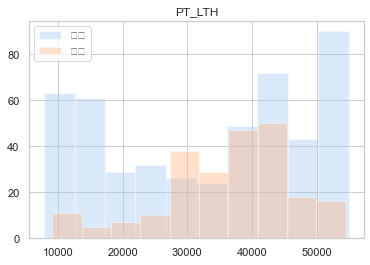

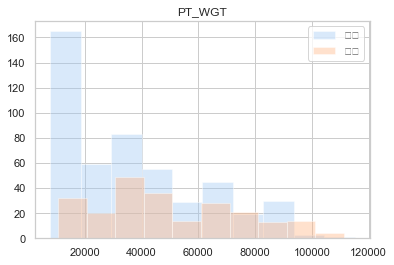

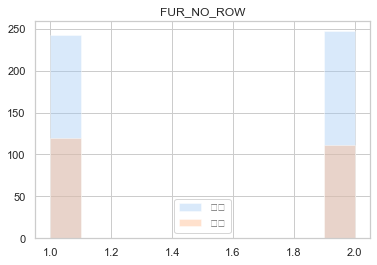

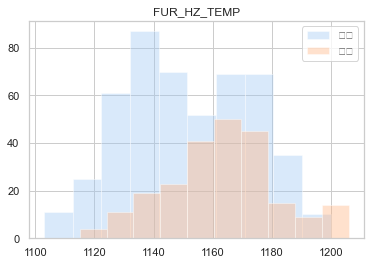

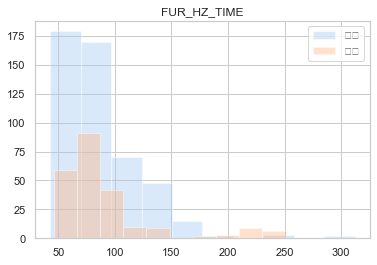

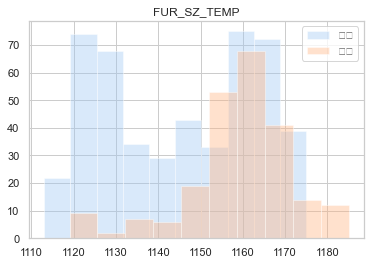

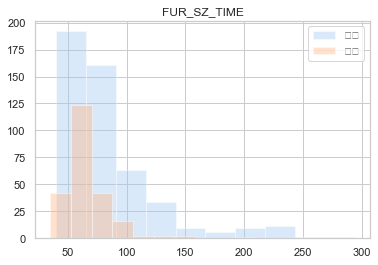

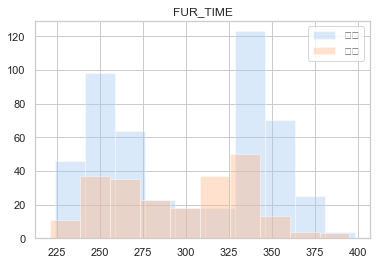

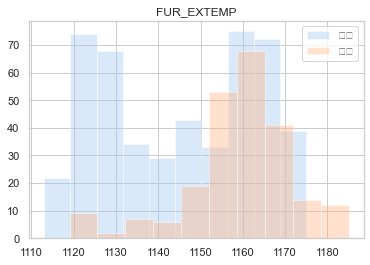

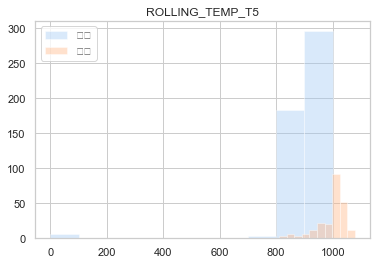

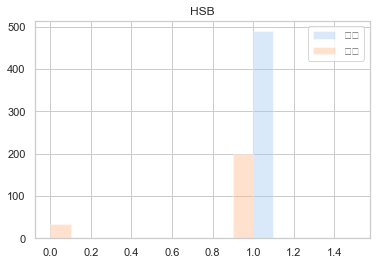

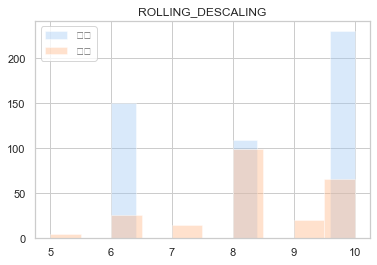

In [120]:
for col in df_scale_x_num:
    plt.hist(df_scale[df_scale["SCALE"]==0][col],label = "양품",alpha = 0.4)
    plt.hist(df_scale[df_scale["SCALE"]==1][col],label = "불량",alpha = 0.4)
    plt.legend()
    plt.title(col)
    plt.show()

<h2> hist plot으로 numeric 변수별(plate,FUR,기타) 양품,불량 나눠서 보기 <h2>

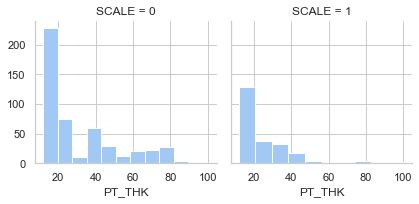

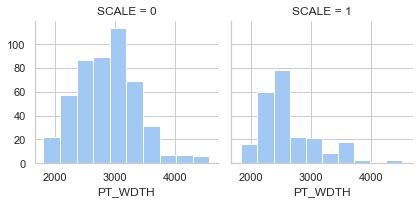

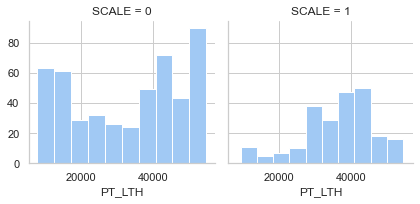

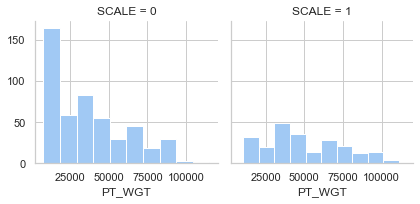

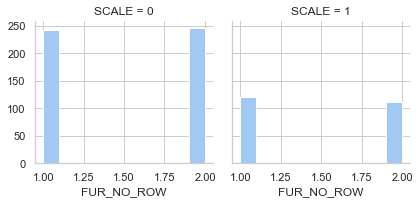

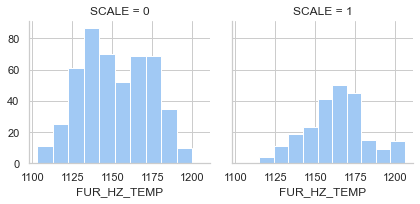

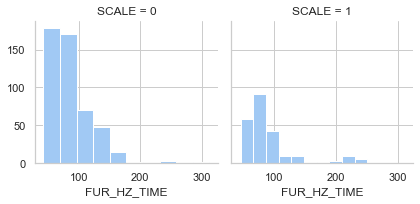

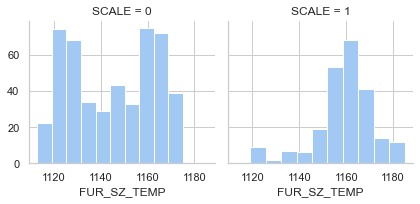

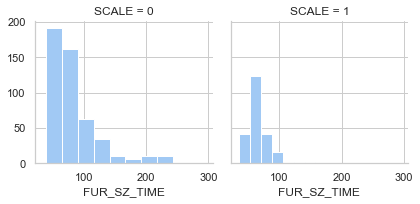

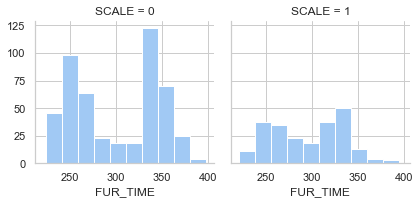

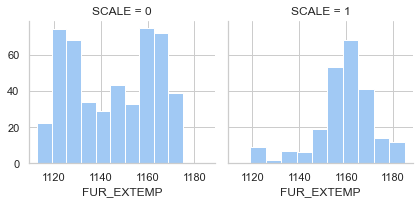

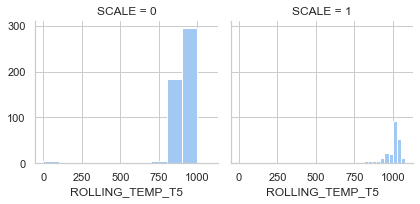

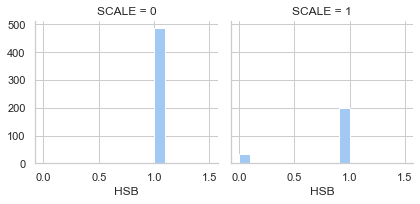

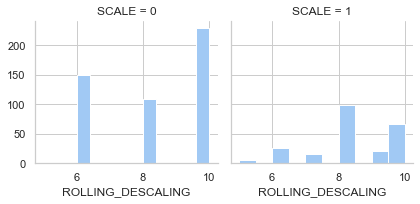

In [121]:
for col in df_scale_x_num:
    grid = sns.FacetGrid(df_scale, col = "SCALE")
    grid.map(plt.hist,col)
    

In [122]:
# 특이점
# ROLLING_DESCALING 의 경우, 압연중 Desaling 횟수가 홀수일때만, 불량이 측정된다.


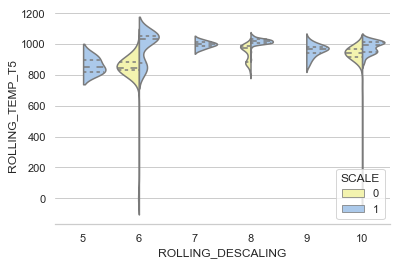

In [123]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
# 작업조별 descaling 횟수와,scale의 분포

# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="ROLLING_DESCALING", y="ROLLING_TEMP_T5", hue="SCALE",
               split=True, inner="quart",
               palette={0: "y", 1: "b"},
               data=df_scale)
sns.despine(left=True)

- 해석: 압연 공정에서, descaling이 짝수번일때 앞뒤로 물을 쏜다, 따라서 홀 수일때만 scale 불량이 생긴다.

<h2> plate 관련 변수별 scale(양품,불량) 밀도확인 <h2>

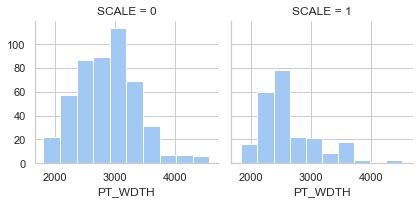

In [124]:
# PLATE 폭
hist_map("PT_WDTH")
# scale = 0 양품,  scale = 1 불량
# 폭이 2000~ 3000 사이에서 불량이 많이 발견

           SCALE                 PT_WDTH               
            mean  sum count         mean      sum count
WDcat                                                  
폭<3000  0.398190  176   442  2468.124434  1090911   442
폭>3000  0.197842   55   278  3346.118705   930221   278


<BarContainer object of 2 artists>

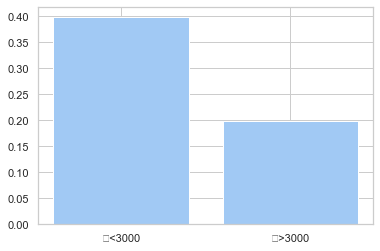

In [125]:
# plate폭을 3000 미만과 이상으로 나누워서 양품의 비율을 살펴보자
tmp_sc = df_scale[["SCALE","PT_WDTH"]]
tmp_sc.SCALE = df_scale_y
tmp_sc["WDcat"] = np.where(tmp_sc.PT_WDTH<3000,'폭<3000','폭>3000')
tmp_sc_agg = tmp_sc.groupby('WDcat',as_index = False).agg(['mean','sum','count'])
print(tmp_sc_agg)
# x축은 폭<3000,두께>3000 , y축은 scale양품의 비율
plt.bar(tmp_sc_agg.index,tmp_sc_agg["SCALE"]['mean'])
# 밑의 그래프를 해석해보면, 두께가 36미만인 plate들을 생산할때 , 상대적으로 양품이 나올 확률이 낮다.
# 밑의 표를 수치를 보면 불량률은 폭<3000(약40%) > 폭>3000(약20%) 2배정도 차이난다.

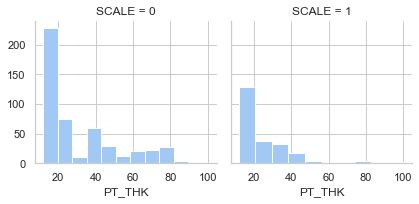

In [126]:
# PLATE 두께
hist_map("PT_THK")
# 두께가 20 미만인 plate를 만들때 가장 scaled이 많이 발생한다.

          SCALE                PT_THK                 
           mean  sum count       mean        sum count
ptcat                                                 
두께<36  0.385519  197   511  18.676769   9543.829   511
두께>36  0.162679   34   209  55.162813  11529.028   209


<BarContainer object of 2 artists>

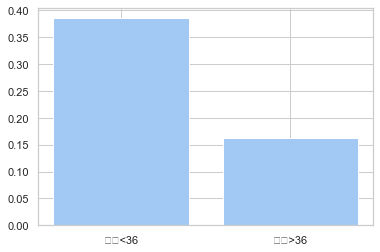

In [127]:
# 두께를 비율로 설명하면 두께와 불량율의 설명력이 높아진다.
tmp_sc = df_scale[["SCALE","PT_THK"]]
tmp_sc.SCALE = df_scale_y
tmp_sc["ptcat"] = np.where(tmp_sc.PT_THK<36,'두께<36','두께>36')
# 양품율 계산
tmp_sc_agg = tmp_sc.groupby('ptcat',as_index = False).agg(['mean','sum','count'])
print(tmp_sc_agg)
# x축은 두께<36,두께>36 , y축은 scale양품의 비율
plt.bar(tmp_sc_agg.index,tmp_sc_agg["SCALE"]['mean'])
# 밑의 그래프를 해석해보면, 두께가 36미만인 plate들을 생산할때 , 상대적으로 양품이 나올 확률이 낮다.
# 밑의 표를 수치를 보면 불량률은 두께<36(약38%) > 두께>36(약16%)2배이상정도 차이난다.

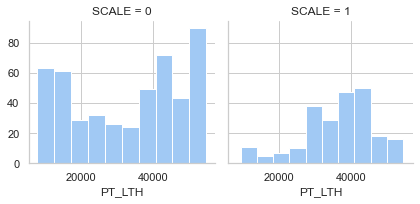

In [128]:
# PLATE 길이
hist_map("PT_LTH")
# 길이가 30m~ 50m로 plate를 만들 때 scale이 많이 발생한다.

           SCALE                   PT_LTH                
            mean  sum count          mean       sum count
LTcat                                                    
길이<30m  0.164609   40   243  17531.024691   4260039   243
길이>30m  0.400419  191   477  42877.809224  20452715   477


<BarContainer object of 2 artists>

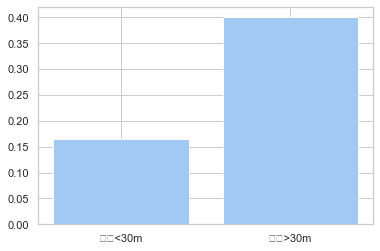

In [129]:
# 길이를 비율로 설명하면 길이와 불량율의 설명력이 높아진다.다
tmp_sc = df_scale[["SCALE","PT_LTH"]]
tmp_sc.SCALE = df_scale_y
tmp_sc["LTcat"] = np.where(tmp_sc.PT_LTH<30000,'길이<30m','길이>30m')
tmp_sc_agg = tmp_sc.groupby('LTcat',as_index = False).agg(['mean','sum','count'])
print(tmp_sc_agg)
# x축은 길이<30m, 길이>30m , y축은 scale양품의 비율
plt.bar(tmp_sc_agg.index,tmp_sc_agg["SCALE"]['mean'])
# 밑의 그래프를 해석해보면, 길이가 30m미만인 plate들을 생산할때 , 상대적으로 양품이 나올 확률이 높다.
# 밑의 표를 수치를 보면 불량률은 길이<30m(약16%) < 길이>30m(약40%)정도 차이난다.

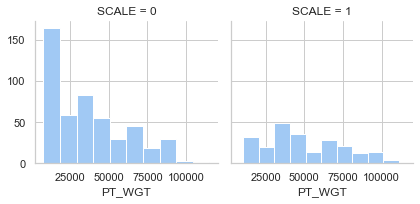

In [130]:
# PLATE 중량
hist_map("PT_WGT")

           SCALE                   PT_WGT                
            mean  sum count          mean       sum count
WTcat                                                    
중량<30톤  0.281426  150   533  29055.253283  15486450   533
중량>30톤  0.433155   81   187  76900.695187  14380430   187


<BarContainer object of 2 artists>

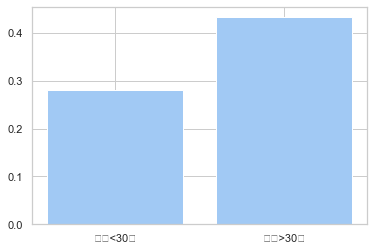

In [131]:
# 중량을 비율로 설명하면 중량와 불량율의 설명력이 높아진다.
tmp_sc = df_scale[["SCALE","PT_WGT"]]
tmp_sc.SCALE = df_scale_y
tmp_sc["WTcat"] = np.where(tmp_sc.PT_WGT<60000,'중량<30톤','중량>30톤')
tmp_sc_agg = tmp_sc.groupby('WTcat',as_index = False).agg(['mean','sum','count'])
print(tmp_sc_agg)
# x축은 중량<30톤, 중량>30톤 , y축은 scale양품의 비율
plt.bar(tmp_sc_agg.index,tmp_sc_agg["SCALE"]['mean'])
# 30톤 미만에서 양품률이 더 높다.
# 밑의 그래프를 해석해보면, 중량이 30톤 미만인 plate들을 생산할때 , 상대적으로 양품이 나올 확률이 높다.
# 밑의 표를 수치를 보면 불량률은 중량<30톤(약28%) < 중량>30톤(약44%)정도 차이난다.

In [132]:
# 범주형 데이터를 제외한 상관계수값을 보여준다.
df_scale.corr()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING
SCALE,1.000000,-0.124858,-0.206021,0.100475,0.218741,-0.022960,0.247670,0.056139,0.374809,-0.240137,-0.049214,0.374809,0.384967,-0.318880,-0.006955
PT_THK,-0.124858,1.000000,-0.313151,-0.862618,-0.397391,-0.002530,-0.523926,0.160110,-0.694770,0.113171,0.413009,-0.694770,-0.373976,-0.017628,-0.836631
PT_WDTH,-0.206021,-0.313151,1.000000,0.119726,0.031009,0.006727,0.180024,-0.119175,0.227296,0.022627,-0.393200,0.227296,-0.021807,-0.041914,0.337540
PT_LTH,0.100475,-0.862618,0.119726,1.000000,0.451815,-0.021185,0.473111,-0.077392,0.645402,-0.070225,-0.251950,0.645402,0.312762,-0.018222,0.809280
PT_WGT,0.218741,-0.397391,0.031009,0.451815,1.000000,-0.022241,0.153331,0.010491,0.359513,-0.190922,-0.057776,0.359513,0.263216,0.022630,0.238986
FUR_NO_ROW,-0.022960,-0.002530,0.006727,-0.021185,-0.022241,1.000000,0.004753,-0.015791,0.009228,0.049045,0.016053,0.009228,-0.004372,-0.021142,0.018219
FUR_HZ_TEMP,0.247670,-0.523926,0.180024,0.473111,0.153331,0.004753,1.000000,-0.114395,0.772907,-0.222141,-0.348223,0.772907,0.265310,-0.035614,0.470899
FUR_HZ_TIME,0.056139,0.160110,-0.119175,-0.077392,0.010491,-0.015791,-0.114395,1.000000,-0.203401,0.177922,0.473137,-0.203401,0.011609,0.008544,-0.137742
FUR_SZ_TEMP,0.374809,-0.694770,0.227296,0.645402,0.359513,0.009228,0.772907,-0.203401,1.000000,-0.450652,-0.477177,1.000000,0.452297,-0.038579,0.648646
FUR_SZ_TIME,-0.240137,0.113171,0.022627,-0.070225,-0.190922,0.049045,-0.222141,0.177922,-0.450652,1.000000,0.443176,-0.450652,-0.207358,-0.007574,-0.105667


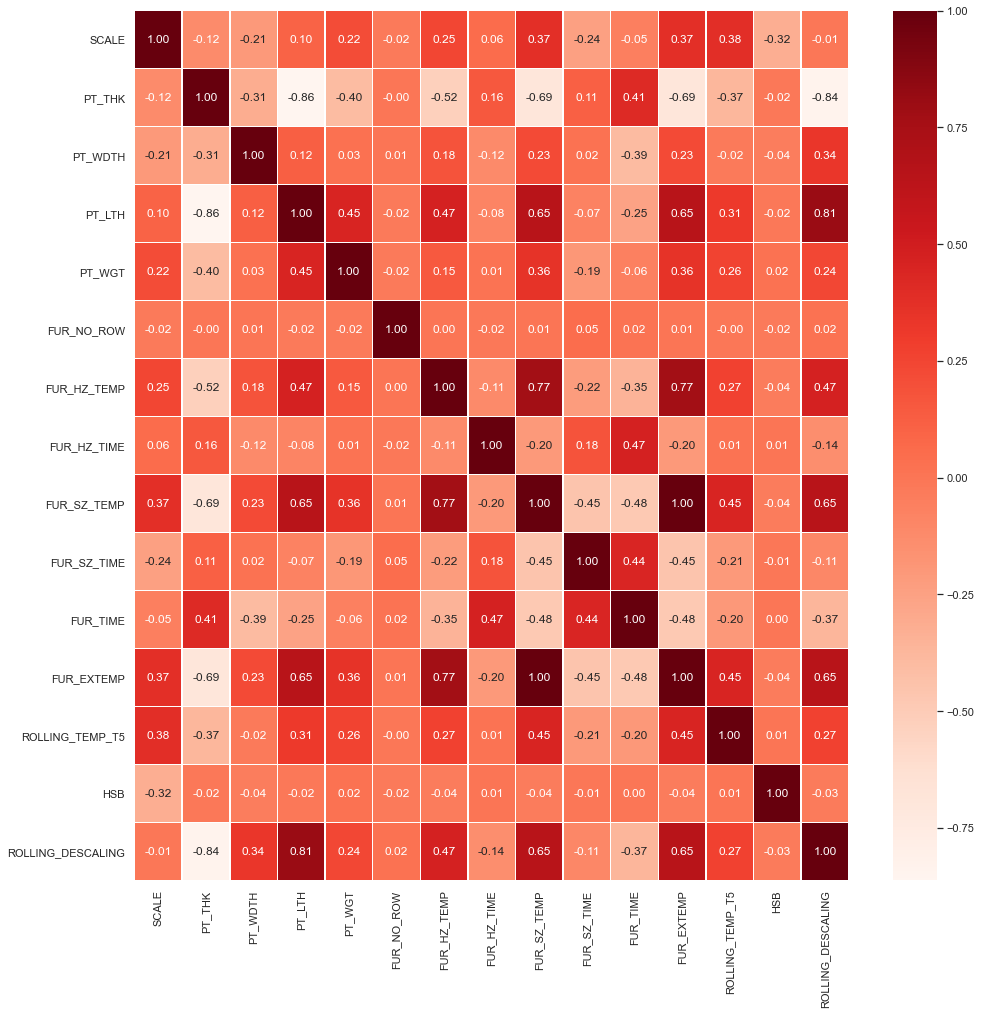

In [133]:
plt.figure(figsize= (16,16))
sns.heatmap(df_scale.corr(),annot= True, fmt = ".2f",linewidths =.5,cmap ='Reds' )

변수간의 상관계수값이 높게 나오는 경우가 존재한다. 
(가열로 탈출온도 (FUR_EXTEMP), 가열로 균열대 온도(FUR_SZ_TEMP)- 상관도 1)
(PLATE 두께 , PLATE LENGTH) - 음의 상관관계 (-0.86)
(PLATE 두께 , ROLLING_DESCALING) - 음의 상관관계 (-0.84)
(PLATE LENGTH, ROLLING_DESCALING) - 양의 상관관계 (0.81)
(FUR_EXTEMP(가열로 탈출온도), FUR_HZ_TEMP(가열로 가열대 온도)) - 0.77




- 균열대는 가열로의 마지막 구간이므로, 가열로 탈출온도와 거의 같다
따라서, 둘중하나의 변수를 제거한다.(FUR_EXTEMP 제거)

In [134]:
# scale 적용
df_scale_x_num_scaled = scale(df_scale_x_num)
df_scale_x_num_scaled = pd.DataFrame(df_scale_x_num_scaled,columns= df_scale_x_num.columns)
df_scale_x_num_scaled

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING
0,0.155812,1.738951,-1.390441,-1.103810,-0.994460,-0.543782,0.729972,-0.949149,-0.544097,-0.409268,-0.949149,0.000734,0.219169,-0.196930
1,0.155812,1.738951,-1.390441,-1.103810,1.005571,-0.543782,0.889399,-0.835252,-0.708951,-0.387221,-0.835252,0.028567,0.219169,-0.196930
2,0.209106,1.568896,-1.095771,-0.944112,-0.994460,-1.263141,0.729972,-1.632537,-0.654000,-0.409268,-1.632537,-0.416748,0.219169,-0.196930
3,0.209106,1.568896,-1.095771,-0.944112,1.005571,-0.160124,0.969113,-1.290843,-0.296815,0.340311,-1.290843,-0.453858,0.219169,-0.196930
4,0.473482,0.562094,-1.518889,-1.174562,-0.994460,-0.735611,1.208255,-1.233894,-0.846330,0.296219,-1.233894,-0.565186,0.219169,-0.196930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-0.476916,1.493531,0.312308,-0.792904,-0.994460,0.799021,-0.439164,0.816269,-0.461669,-1.224987,0.816269,0.659429,0.219169,-0.196930
716,-0.741293,0.782392,1.006578,-0.935621,-0.994460,-0.256038,-0.731448,1.101013,-0.489145,-1.379312,1.101013,0.121341,0.219169,1.036021
717,-0.661875,1.224921,0.677679,-0.885084,1.005571,0.655149,-0.625163,0.759320,-0.049533,-1.180894,0.759320,0.130618,0.219169,1.036021
718,-0.714646,1.074191,1.043267,1.566994,1.005571,1.134722,-0.067166,0.759320,-0.928757,-1.269080,0.759320,0.056399,0.219169,1.036021


In [135]:
df_scale_y = pd.DataFrame(df_scale_y)
df1 = df_scale_y.join(df_scale_x_num_scaled)
df1
# 스케일한 데이터 프레임을 pair_plot을 그려본다.- 변수간의 상관관계를 그림으로 확인한다.

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING
0,0,0.155812,1.738951,-1.390441,-1.103810,-0.994460,-0.543782,0.729972,-0.949149,-0.544097,-0.409268,-0.949149,0.000734,0.219169,-0.196930
1,0,0.155812,1.738951,-1.390441,-1.103810,1.005571,-0.543782,0.889399,-0.835252,-0.708951,-0.387221,-0.835252,0.028567,0.219169,-0.196930
2,0,0.209106,1.568896,-1.095771,-0.944112,-0.994460,-1.263141,0.729972,-1.632537,-0.654000,-0.409268,-1.632537,-0.416748,0.219169,-0.196930
3,0,0.209106,1.568896,-1.095771,-0.944112,1.005571,-0.160124,0.969113,-1.290843,-0.296815,0.340311,-1.290843,-0.453858,0.219169,-0.196930
4,0,0.473482,0.562094,-1.518889,-1.174562,-0.994460,-0.735611,1.208255,-1.233894,-0.846330,0.296219,-1.233894,-0.565186,0.219169,-0.196930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,1,-0.476916,1.493531,0.312308,-0.792904,-0.994460,0.799021,-0.439164,0.816269,-0.461669,-1.224987,0.816269,0.659429,0.219169,-0.196930
716,0,-0.741293,0.782392,1.006578,-0.935621,-0.994460,-0.256038,-0.731448,1.101013,-0.489145,-1.379312,1.101013,0.121341,0.219169,1.036021
717,0,-0.661875,1.224921,0.677679,-0.885084,1.005571,0.655149,-0.625163,0.759320,-0.049533,-1.180894,0.759320,0.130618,0.219169,1.036021
718,0,-0.714646,1.074191,1.043267,1.566994,1.005571,1.134722,-0.067166,0.759320,-0.928757,-1.269080,0.759320,0.056399,0.219169,1.036021


In [137]:
# plt.figure(figsize= (16,16))
# sns.heatmap(df_scale_x_num_scaled.corr(),annot= True, fmt = ".2f",linewidths =.5,cmap ='Blues' )

<h3> 범주형 설명변수(강종,스펙) 더미 변수 만들기 <h3>

In [138]:
# spec 더미
df_spec_dummy = pd.get_dummies(df_scale['SPEC'])
df_spec_dummy = df_spec_dummy[["JS-SM490YB","LR-A","NV-A","PILAC-BT33","NV-A32","LR-AH32","JS-SM490A","BV-B"]]
df_spec_dummy

,JS-SM490YB,LR-A,NV-A,PILAC-BT33,NV-A32,LR-AH32,JS-SM490A,BV-B
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
715,0,0,0,0,0,0,0,0
716,0,0,0,0,1,0,0,0
717,0,0,0,0,1,0,0,0
718,0,1,0,0,0,0,0,0


In [139]:
# 강종 더미
df_st_dummy = pd.get_dummies(df_scale['STEEL_KIND'])
df_st_dummy = df_st_dummy.drop(["T3","C1"],axis = 1)
df_st_dummy

,C0,C3,T0,T1,T5,T7,T8
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
715,1,0,0,0,0,0,0
716,1,0,0,0,0,0,0
717,1,0,0,0,0,0,0
718,1,0,0,0,0,0,0


In [140]:
print(len(df_st_dummy.columns))
print(len(df_spec_dummy.columns))

7
8


 제거될 독립변수 : FUR_NO, WORK_GR, FUR_EXTEMP
 작업조와 가열로 호기는 위의 탐색분석결과 유의하지 않아 지우고, FUR_EXTEMP는 균열대온도와 상관도가 1이므로 하나의 변수로 설명이 가능하여 지운다.
 STEEL_KIND,SPEC는 더미가 대체한다.(원하는 스펙과 강종으로 위에서 더미를 생성했다.)

In [141]:
drop_lst = ["SPEC","STEEL_KIND","FUR_NO","FUR_EXTEMP","WORK_GR"]

df_scale_x = df_scale_x.drop(drop_lst,axis = 1)


In [142]:
df_scale_x = df_scale_x.join([df_st_dummy,df_spec_dummy])
df_scale_x

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,...,T7,T8,JS-SM490YB,LR-A,NV-A,PILAC-BT33,NV-A32,LR-AH32,JS-SM490A,BV-B
0,32.25,3707,15109,14180,1,1144,116,1133,59,282,...,0,0,0,0,0,0,0,0,0,0
1,32.25,3707,15109,14180,2,1144,122,1135,53,283,...,0,0,0,0,0,0,0,0,0,0
2,33.27,3619,19181,18130,1,1129,116,1121,55,282,...,0,1,0,0,0,0,0,0,0,0
3,33.27,3619,19181,18130,2,1152,125,1127,68,316,...,0,1,0,0,0,0,0,0,0,0
4,38.33,3098,13334,12430,1,1140,134,1128,48,314,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,20.14,3580,38639,21870,1,1172,72,1164,62,245,...,0,0,0,0,0,0,0,0,0,0
716,15.08,3212,48233,18340,1,1150,61,1169,61,238,...,0,0,0,0,0,0,1,0,0,0
717,16.60,3441,43688,19590,2,1169,65,1163,77,247,...,0,0,0,0,0,0,1,0,0,0
718,15.59,3363,48740,80240,2,1179,86,1163,45,243,...,0,0,0,1,0,0,0,0,0,0


In [143]:
# df_scale_x = df_scale_x_num.join(df_spec_dummy) # spec더미 데이터 프레인까지 합쳐서 최종 설명변수 만듬
# # df_scale_x = df_scale_x.join(df_st_dummy)
# df_scale_x.columns
# print(len(df_scale_x.columns))
# df_scale_x.SPEC

In [144]:
df_scale_x.columns

Index(['PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT', 'FUR_NO_ROW', 'FUR_HZ_TEMP',
       'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_TIME',
       'ROLLING_TEMP_T5', 'HSB', 'ROLLING_DESCALING', 'C0', 'C3', 'T0', 'T1',
       'T5', 'T7', 'T8', 'JS-SM490YB', 'LR-A', 'NV-A', 'PILAC-BT33', 'NV-A32',
       'LR-AH32', 'JS-SM490A', 'BV-B'],
      dtype='object')

In [145]:
df_scale_x.shape # 최종변수 설명변수 개수

(720, 28)

In [146]:
df_scale_x.isnull().sum()

PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
C0                   0
C3                   0
T0                   0
T1                   0
T5                   0
T7                   0
T8                   0
JS-SM490YB           0
LR-A                 0
NV-A                 0
PILAC-BT33           0
NV-A32               0
LR-AH32              0
JS-SM490A            0
BV-B                 0
dtype: int64

<h3> 분류 알고리즘 - Decision Tree, RandomForest, SVM, KNN, Gradient Boosting<h3>

<h2> Decision Tree <h2>

In [ ]:
x_tr,x_test,y_tr,y_test = train_test_split(df_scale_x,df_scale_y,random_state= 2222)
print("x_train size :{}".format(x_tr.shape))
print("x_test size :{}".format(x_test.shape))
print("y_train size :{}".format(y_tr.shape))
print("y_test size :{}".format(y_test.shape))


In [ ]:
print(len(x_tr.columns))
print(len(df_scale_x.columns))

In [ ]:
x_tr.columns
print(len(x_tr.columns))

In [ ]:
x_tr # check

In [ ]:
tree_uncustomized = DecisionTreeClassifier(random_state=2222)
tree_uncustomized.fit(x_tr,y_tr)
print("Accurary on training set:{:.3f}".format(tree_uncustomized.score(x_tr,y_tr)))
print("Accurary on test set:{:.3f}".format(tree_uncustomized.score(x_test,y_test)))

In [ ]:
# gridsearch cv
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold
from sklearn.tree import export_graphviz
import graphviz

params_grid = {'max_depth': [i for i in range(1,10)],
             'min_samples_leaf' : [i*10 for i in range(1,15)],
             'criterion' : ['gini','entropy']}

grid_search = GridSearchCV(tree_uncustomized, param_grid = params_grid)
grid_search.fit(x_tr,y_tr)

print("Best Score : {}".format(grid_search.best_score_))
print("Best params : {}".format(grid_search.best_params_))

In [ ]:
from sklearn.metrics import accuracy_score
# 최적의 파라미터 : Best params : {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10}

best_dt_model = DecisionTreeClassifier(max_depth=5,min_samples_leaf=10,criterion = 'gini' )
best_dt_model.fit(x_tr,y_tr)

print("Accurary on training set:{:.3f}".format(best_dt_model.score(x_tr,y_tr)))
print("Accurary on test set:{:.3f}".format(best_dt_model.score(x_test,y_test)))

- gridsearCV 로 찾은 파라미터로 더 높은 정확도를 얻었다
- 설명변수의 중요도 그래프를 참고하면, 총 4개의 변수가 쓰였고, ROLLING_TEMP_T5가 가장 중요도가 높게 나왔다.

<h3> RandomForest <h3>

In [ ]:
rf_uncustomized = RandomForestClassifier(random_state = 2222)
rf_uncustomized.fit(x_tr,y_tr)

print("Accurcy on train set :{:.3f}".format(rf_uncustomized.score(x_tr,y_tr)))
print("Accurcy on test set :{:.3f}".format(rf_uncustomized.score(x_test,y_test)))

In [ ]:
# params_grid = {'max_depth': [i for i in range(1,10)],
#              'min_samples_leaf' : [i*10 for i in range(1,10)],
#              'criterion' : ['gini','entropy'],
#               }

# grid_search = GridSearchCV(rf_uncustomized, param_grid = params_grid)
# grid_search.fit(x_tr,y_tr)

# print("Best Score : {}".format(grid_search.best_score_))
# print("Best params : {}".format(grid_search.best_params_))

In [ ]:
# best params : criterion entropy, max_depth : 4 , min_samples_leaf : 20, 
best_rf_model = RandomForestClassifier(criterion ='entropy', max_depth= 4, min_samples_leaf= 20,random_state = 2222)
best_rf_model.fit(x_tr,y_tr)

print("Accurcy on train set :{:.3f}".format(best_rf_model.score(x_tr,y_tr)))
print("Accurcy on test set :{:.3f}".format(best_rf_model.score(x_test,y_test)))

In [ ]:
rf_feature_importance = pd.DataFrame()
rf_feature_importance["feature"] = x_tr.columns
rf_feature_importance["importance"] = best_rf_model.feature_importances_
rf_feature_importance.sort_values(by = "importance",ascending = False)

def plot_feature_importances(model):
    n_features = x_tr.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align = "center")
    plt.yticks(np.arange(n_features),x_tr.columns)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1,n_features)
    
plot_feature_importances(best_rf_model)

In [ ]:
rf_feature_importance.sort_values("importance",ascending=False)
# rf 결과 가열로 균열대 온도가 가장 높게 나왔고, 그다음으로 압연온도가 높게 나왔다.

### rf 결과 가열로 균열대 온도가 가장 높게 나왔고, 그다음으로 압연온도가 높게 나왔다.

<h3> SVM <h3>

In [ ]:
df_scale2= pd.read_csv("/home/piai/Desktop/POSCO_Ai-BigData_academy/Week2_BigData/실습파일//SCALE불량.csv",engine = 'python')
df_scale2

In [ ]:
df_scale2.HSB = df_scale2.HSB.map(lambda x:1 if x == "적용" else 0)

In [ ]:
df_scale2_x = df_scale2.drop("SCALE",axis =1)
df_scale2_y = df_scale2["SCALE"]

In [ ]:
df_scale_x_num2 = df_scale2_x.select_dtypes(exclude = "object")

In [ ]:
df_scale_x_num2 = df_scale_x_num2.drop("FUR_EXTEMP",axis = 1)
df_scale_x_num2

In [ ]:
df_scale_x_num2_scale = scale(df_scale_x_num2,axis = 0)

In [ ]:
df_scale_x_num2_scale = pd.DataFrame(df_scale_x_num2_scale, columns= df_scale_x_num2.columns)

In [ ]:
df_scale_x_num2_scale

In [ ]:
df_scale_x2 = df_scale_x_num2_scale.join([df_st_dummy,df_spec_dummy])
df_scale_x2 # scale한 numeric변수와, 더미한 범주형 변수로 이루어진 데이터 프레임

In [ ]:
x_tr2, x_test2,y_tr2,y_test2 = train_test_split(df_scale_x2,df_scale2_y)


In [ ]:
x_tr2 # check

In [ ]:
svm_uncustomized_scaled = SVC(random_state=1234)
svm_uncustomized_scaled.fit(x_tr2,y_tr2)

print("accuracy on train set: {:.3f}".format(svm_uncustomized_scaled.score(x_tr2,y_tr2)))
print("accuracy on test set: {:.3f}".format(svm_uncustomized_scaled.score(x_test2,y_test2)))

- 범주형 데이터를 포함해서 svm을 돌리고 싶으면, 더미변수를 포함하여, scaling해줘야한다.
- svm은 데이터가 선형적이여야 하므로, 더미를 scaling안하고 모델을 적용시키면, 정확도가 매우 낮아진다.

In [ ]:
x_tr_scaled = scale(x_tr,axis = 0)
x_test_scaled = scale(x_test,axis =0)

svm_uncustomized_scaled = SVC(random_state=1234)
svm_uncustomized_scaled.fit(x_tr_scaled,y_tr)

print("accuracy on train set: {:.3f}".format(svm_uncustomized_scaled.score(x_tr_scaled,y_tr)))
print("accuracy on test set: {:.3f}".format(svm_uncustomized_scaled.score(x_test_scaled,y_test)))

In [ ]:
# svc =SVC()
# params_grid = {'C' : [i+1 for i in range(15)],'gamma':[i+1/10 for i in range(10)],'kernel':['rbf','linear','poly','sigmoid']} 
# # 최적의 파라미터: 최적의 이웃 수:6
# grid_search = GridSearchCV(svc,param_grid=params_grid)
# grid_search.fit(x_tr_scaled,y_tr)

# print("Best_score : {}".format(grid_search.best_score_))
# print("Best_params: {}".format(grid_search.best_params_))

In [ ]:
svm_best_model = SVC(C=13,gamma=0.1,kernel = 'linear',random_state=2222)
# 마지막의 예측 정확도 비교는 test 데이터로 하므로, test데이터로 fit하고, 다
# 마지막에 test데이터로 예측한 결과와 실제 test데이터를 비교하여 정확도를 얻는다.
svm_best_model.fit(x_tr_scaled,y_tr) # 피팅하는 데이터가 train
print("accuracy on train set: {:.3f}".format(svm_best_model.score(x_tr_scaled,y_tr)))
print("accuracy on test set: {:.3f}".format(svm_best_model.score(x_test_scaled,y_test)))

- gridsearCV로 구한 최적의 파라미터로 더 높은 정확도를 얻었다.

<h3> ROC 곡선 <h3>

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

print("Roc AUC: {}".format(roc_auc_score(y_test,svm_best_model.predict(x_test_scaled))))
fpr, tpr, thresholds = roc_curve(y_test,svm_best_model.decision_function(x_test_scaled))

In [ ]:
plt.plot(fpr,tpr)

- SupportVectorMachine의 결과, 정확도는 0.87이 나왔고, ROC AUC : 0.86 가 나왔다.

### 결론 : scale불량의 핵심요인 인자를 찾는 과제에서 SVM은 적합한 알고리즘이 아니라고 생각한다.

<h3> KNN <h3>

In [ ]:
knn_scaled = KNeighborsClassifier()
# 스케일한 이후 정확도가 이전보다 높아졌음을 알 수 있다.
knn_scaled.fit(x_tr_scaled,y_tr)
y_pred = knn_scaled.predict(x_test_scaled)

print("predict test set:{}".format(y_pred.tolist()[:10]))
print("test set label:{}".format(y_test.values.tolist()[:10]))
print("accuracy:{}".format(knn_scaled.score(x_test_scaled,y_test)))

In [ ]:
# # gridSearch CV
# params_grid = {'n_neighbors' : [i+1 for i in range(20)],
#               'weights' : ["uniform","distance"],
#               'algorithm' : ["ball_tree","kd_tree","brute"],         
#               'metric':["euclidean","minkowski","manhattan"]}#최적의파라미터값을 찾으면서 학습

# grid_search = GridSearchCV(knn_scaled,param_grid=params_grid)
# grid_search.fit(x_tr_scaled,y_tr)

# print("Best_score : {}".format(grid_search.best_score_))
# print("Best_params: {}".format(grid_search.best_params_))

In [ ]:
# 최적의 파라미터: ball_tree,manhattan, n_neightbors:5, distance
knn_best_model = KNeighborsClassifier(n_neighbors=5,weights="distance",algorithm="ball_tree",metric="manhattan")
knn_best_model.fit(x_tr_scaled,y_tr)
print("train data accuracy :{0:.3f}".format(knn_best_model.score(x_tr_scaled,y_tr)))
print("test data accuracy :{0:.3f}".format(knn_best_model.score(x_test_scaled,y_test)))

### 결론 : scale불량의 핵심요인 인자를 찾는 과제에서 knn은 적합한 알고리즘이 아니라고 생각한다.

<h3> Gradient Boost <h3>

In [ ]:
gb_scaled = GradientBoostingClassifier(random_state = 2222)
gb_scaled.fit(x_tr_scaled,y_tr)

print("train 정확도: {:.3f}".format(gb_scaled.score(x_tr_scaled,y_tr)))
print("test 정확도: {:.3f}".format(gb_scaled.score(x_test_scaled,y_test)))

In [ ]:
# # gridSearch CV
# params_grid = {'learning_rate' : [i/10 for i in range(1,10)],
#               'max_depth': [i for i in range(1,10)],
#               'min_samples_leaf' : [i*10 for i in range(1,10)],        
#               'n_estimators':[i*10 for i in range(1,10)]}#최적의파라미터값을 찾으면서 학습
# # 최적의 파라미터: 최적의 이웃 수:6
# grid_search = GridSearchCV(gb_scaled,param_grid=params_grid)
# grid_search.fit(x_tr_scaled,y_tr)

# print("Best_score : {}".format(grid_search.best_score_))
# print("Best_params: {}".format(grid_search.best_params_))

In [ ]:
# 최적의 params = learning_rate:0.4 , max_depth:3 min_samples_lear: 10, n_estimators :80
best_gb_model = GradientBoostingClassifier(learning_rate= 0.4,min_samples_leaf=10,max_depth=3,n_estimators=80)
best_gb_model.fit(x_tr_scaled,y_tr)
print("train 정확도: {:.3f}".format(best_gb_model.score(x_tr_scaled,y_tr)))
print("test 정확도: {:.3f}".format(best_gb_model.score(x_test_scaled,y_test)))


In [ ]:
gb_feature_importance = pd.DataFrame()
gb_feature_importance["feature"] = x_tr.columns
gb_feature_importance["importance"] = best_gb_model.feature_importances_
gb_feature_importance.sort_values(by = "importance",ascending = False)

def plot_feature_importances(model):
    n_features = x_tr.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align = "center")
    plt.yticks(np.arange(n_features),x_tr.columns)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1,n_features)
    
plot_feature_importances(best_gb_model)

### GB 결과 압연온도(ROLLING_TEMP_T5) 변수의 중요도가 가장 높게 나왔다.

<h2> 모델 평가 <h2>

In [ ]:
names = ["Rf","Gb","Dt","Knn","svm"]
train_accuracy= []
test_accuracy = []
model_f1_score = []
clfs= [
    RandomForestClassifier(max_depth=4,min_samples_leaf=10,criterion='gini',random_state=1234),
    GradientBoostingClassifier(learning_rate= 0.4,max_depth=3,min_samples_leaf=10,n_estimators=80,random_state=1234),
    DecisionTreeClassifier(max_depth=5,min_samples_leaf=10,criterion='gini'),
    KNeighborsClassifier(n_neighbors= 5,weights="distance",algorithm="ball_tree",metric="manhattan"),
    SVC(C=1,gamma=0.1,kernel = 'linear',random_state=1234)
]
plt.figure()
start = time.time()
for name,clf in zip(names,clfs):
    clf.fit(x_tr_scaled,y_tr)
    train_accuracy.append(clf.score(x_tr_scaled,y_tr))
    test_accuracy.append(clf.score(x_test_scaled,y_test))
#   y_pred = clf.predict(x_test_scaled)[:,1]
    model_f1_score.append(f1_score(y_test,clf.predict(x_test_scaled)))

In [ ]:
df_eval = pd.DataFrame(index= names)
df_eval["TrainAccuracy"] = train_accuracy
df_eval["TestAccuracy"] = test_accuracy
df_eval["F1Score"] = model_f1_score
df_eval.round(3)

In [ ]:
df_eval.plot.bar(rot=0)

In [ ]:
best_gb_model = GradientBoostingClassifier(learning_rate= 0.4,min_samples_leaf=10,max_depth=3,n_estimators=80)
best_gb_model.fit(x_tr_scaled,y_tr)
y_pred = best_gb_model.predict(x_test_scaled)
print("test 정확도 {}".format(accuracy_score(y_test,y_pred)))


In [ ]:
# 설명변수 중요도
gb_feature_importance = pd.DataFrame()
# df_tr_scaled 와 df_tr의 columns는 같으므로 df형태의 df_tr을 쓴다.
gb_feature_importance["feature"] = x_tr.columns
gb_feature_importance["importance"] = best_gb_model.feature_importances_
gb_feature_importance.sort_values(by = "importance",ascending = False).round(3)

def plot_feature_importances(model):
    n_features = x_tr_scaled.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align="center")
    plt.yticks(np.arange(n_features),x_tr.columns)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1,n_features)
    
plot_feature_importances(best_gb_model)

# 이번 Scale 과제에서 도출할 수 있었던 Scale 불량은 ROLLING_TEMP_T5 압연온도이다.
# 압연과정에서 문제가 발생하여 이부분을 체크하고 검토하여 수정하면 Scale 줄이는데 도움이 된다고 결론을 내린다.
